,Description,Value
0,Session id,3173
1,Target,siteenergyusekbtu
2,Target type,Regression
3,Original data shape,"(6381, 12)"
4,Transformed data shape,"(6381, 41)"
5,Transformed train set shape,"(5104, 41)"
6,Transformed test set shape,"(1277, 41)"
7,Numeric features,9
8,Categorical features,2
9,Rows with missing values,19.6%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,956816.0018,22049939662055.2422,4019091.9579,0.9543,0.2558,0.1660,0.4560
gbr,Gradient Boosting Regressor,1339120.6737,44776116489103.9219,5325382.4342,0.9223,0.4053,0.3547,0.1870
xgboost,Extreme Gradient Boosting,1168343.8938,43981542942310.3984,5518459.4500,0.9198,0.3239,0.2329,0.2500
br,Bayesian Ridge,1797866.7624,22330416416769.1602,4533241.2170,0.9177,0.9143,0.6485,0.0380
ridge,Ridge Regression,1810713.8873,22326149887371.6172,4535799.8031,0.9173,0.9143,0.6587,0.0320
lr,Linear Regression,1815270.7016,22360827603130.8008,4540466.5728,0.9170,0.9007,0.6619,0.2830
lasso,Lasso Regression,1815262.6619,22360801298998.9062,4540461.4209,0.9170,0.9005,0.6619,0.1900
llar,Lasso Least Angle Regression,1815262.6030,22360798751456.5234,4540461.0973,0.9170,0.9006,0.6619,0.0370
en,Elastic Net,1821339.6842,23629667760466.9492,4655157.7137,0.9151,0.8934,0.5788,0.0690
rf,Random Forest Regressor,1199536.1818,77427072526739.9688,6660244.9925,0.9119,0.2732,0.1830,0.5290


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,891374.0905,10538103836184.7227,3246244.5743,0.9930,0.2541,0.1661
1,906562.8809,8780492946856.9893,2963189.6576,0.9654,0.2425,0.1608
2,912045.4098,6827986455005.9453,2613041.6099,0.9270,0.2509,0.1743
3,1526765.2000,101395688776467.0469,10069542.6300,0.9559,0.2772,0.1768
4,1198633.0770,49183117525993.0391,7013067.6259,0.9532,0.2646,0.1711
5,837996.5873,13833036839965.9531,3719279.0753,0.9692,0.2293,0.1500
6,742635.3582,6435165384758.1807,2536762.7766,0.9002,0.2560,0.1700
7,967303.5763,9807975944624.5527,3131768.8204,0.9365,0.2463,0.1569
8,614229.5380,2329821200820.0049,1526375.1835,0.9868,0.2465,0.1584


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


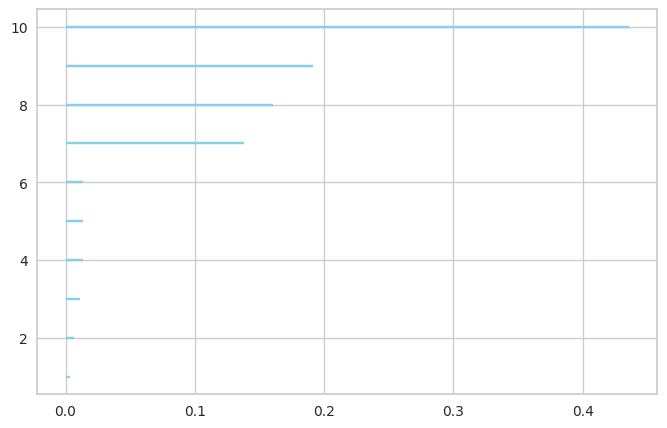

In [1]:
import pandas as pd
from pycaret.regression import *

# Load your data into a DataFrame
data = pd.read_csv('data/dataset_trainninng.csv', sep=';')

# Initialize the multi-target regression setup using the setup() function
regression_setup = setup(data, target='siteenergyusekbtu', train_size=0.8)

# Compare different regression models using the compare_models() function
best_model = compare_models()

# Create the final multi-target regression model using the create_model() function with the chosen best model
final_model = create_model(best_model)

# Evaluate the performance of the final model using the evaluate_model() function
evaluate_model(final_model)

# # Make predictions on new/unseen data using the predict_model() function
# new_data_predictions = predict_model(final_model, data=new_data)

In [9]:
data.head()

,siteenergyusekbtu,totalghgemissions,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
0,7226362.5,249.98,1927.0,1.0,1.0,1.0,88434.0,1.0,12.0,88434.0,NonResidential,Hotel
1,8387933.0,295.86,1996.0,1.0,1.0,0.0,83880.0,1.0,11.0,88502.0,NonResidential,Hotel
2,72587024.0,2089.28,1969.0,1.0,1.0,1.0,756493.0,1.0,41.0,759392.0,NonResidential,Hotel
3,6794584.0,286.43,1926.0,1.0,1.0,1.0,61320.0,1.0,10.0,61320.0,NonResidential,Hotel
4,14172606.0,505.01,1980.0,1.0,1.0,0.0,123445.0,1.0,18.0,113580.0,NonResidential,Hotel
